# FLIGHT FARE PREDICTION - UNSCHOOL_PROJECT_SUBMISSION

In [1]:
# Importing necessary libraries...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()   #nullifying parameters

In [2]:
# import data-set...

train_data = pd.read_excel(r"C:\\FE ENGINNEERING\\UNSCHOOL\\UNSCHOOL - PROJECTS\\PROJECTS\\DATA SCIENCE\\Data_Train_.xlsx")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2833,Air Asia,15/05/2019,Kolkata,Banglore,CCU → DEL → BLR,22:40,10:40 16 May,12h,1 stop,No info,5192
3732,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → BOM → COK,09:15,19:00,9h 45m,1 stop,No info,11622
2192,SpiceJet,12/05/2019,Mumbai,Hyderabad,BOM → HYD,13:15,14:45,1h 30m,non-stop,No check-in baggage included,2175
5726,IndiGo,1/03/2019,Chennai,Kolkata,MAA → CCU,14:40,17:05,2h 25m,non-stop,No info,7295
7789,IndiGo,1/05/2019,Banglore,Delhi,BLR → DEL,10:10,13:00,2h 50m,non-stop,No info,3943
10355,SpiceJet,18/03/2019,Mumbai,Hyderabad,BOM → HYD,13:10,14:30,1h 20m,non-stop,No info,2437
6522,Jet Airways,6/06/2019,Delhi,Cochin,DEL → COK,11:00,14:15,3h 15m,non-stop,In-flight meal not included,7202
650,IndiGo,9/04/2019,Kolkata,Banglore,CCU → BBI → BLR,19:55,23:50,3h 55m,1 stop,No info,4226
6271,Multiple carriers,9/05/2019,Delhi,Cochin,DEL → BOM → COK,13:00,01:30 10 May,12h 30m,1 stop,No info,9424
4171,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,09:00,19:00,10h,1 stop,In-flight meal not included,10675


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum() # checking if any null values exists...

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis or EDA

From description we can see that Date_of_Journey is a object type. Therefore, we have to convert this datatype into timestamp so as to use this column properly
for prediction.

For this we requires pandas <b>'to_datetime'</b> to convert object datatype to datatime 'dtype'.

In [9]:
train_data["Journey_Day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day      #.dt.day method will extract only day of that data...

In [10]:
train_data["Journey_Month"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month   #.dt.month method will extract only month of that data...

In [11]:
train_data.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
9137,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,10:45 13 Mar,11h 50m,1 stop,In-flight meal not included,11087,12,3
8749,IndiGo,12/06/2019,Delhi,Cochin,DEL → BLR → COK,17:05,22:25,5h 20m,1 stop,No info,6147,12,6
7410,Air Asia,9/06/2019,Kolkata,Banglore,CCU → BBI → BLR,06:50,10:30,3h 40m,1 stop,No info,6857,9,6
2854,IndiGo,21/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4804,21,4
2130,IndiGo,15/05/2019,Delhi,Cochin,DEL → COK,05:35,08:50,3h 15m,non-stop,No info,6015,15,5


In [12]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)    # Since we have converted Date_of_journey column into integers, Now we can drop as it is of no use...

In [13]:
# As, Dep_Time/Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time...

# Extracting Hours from Dep_Time
train_data["Dep_Hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time
train_data["Dep_Min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [14]:
train_data.sample(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
1080,Jet Airways,Banglore,Delhi,BLR → DEL,15:15,18:10,2h 55m,non-stop,In-flight meal not included,7229,21,6,15,15
4120,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,22:50,09:30 16 Mar,10h 40m,1 stop,In-flight meal not included,11087,18,3,22,50
2026,IndiGo,Mumbai,Hyderabad,BOM → HYD,09:10,10:40,1h 30m,non-stop,No info,3342,1,4,9,10
7200,SpiceJet,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 May,1h 30m,non-stop,No check-in baggage included,1965,1,5,22,45
2674,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,20:25,14:25 07 Jun,18h,1 stop,In-flight meal not included,10539,6,6,20,25
88,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,08:25,20:45,12h 20m,1 stop,In-flight meal not included,7064,1,4,8,25
2598,IndiGo,Kolkata,Banglore,CCU → BLR,15:20,17:55,2h 35m,non-stop,No info,5618,6,3,15,20
6382,IndiGo,Delhi,Cochin,DEL → BOM → COK,20:30,01:35 22 Mar,5h 5m,1 stop,No info,6232,21,3,20,30
918,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 16 Jun,18h 45m,2 stops,No info,13014,15,6,9,40
552,Vistara,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3739,21,3,7,5


In [15]:
train_data.drop(["Dep_Time"], axis=1, inplace=True)        # Now we can drop Dep_Time as it is of no use...

In [16]:
train_data.sample(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
7967,Jet Airways,Banglore,Delhi,BLR → DEL,20:45,3h,non-stop,No info,7229,21,4,17,45
1992,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 07 Jun,1h 30m,non-stop,No check-in baggage included,1965,6,6,22,45
5080,IndiGo,Delhi,Cochin,DEL → HYD → COK,22:30,10h 35m,1 stop,No info,8216,18,5,11,55
8570,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,13h 25m,1 stop,In-flight meal not included,10262,6,6,15,0
7584,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,07:40 19 Mar,13h,1 stop,In-flight meal not included,7832,21,3,18,40


In [17]:
# Arrival Time is when the plane pulls up to the gate...
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours from Arrival_Time
train_data["Arrival_Hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time
train_data["Arrival_Min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute


In [18]:
train_data.drop(["Arrival_Time"], axis=1, inplace=True)        # Now we can drop Arrival_Time as it is of no use...

In [19]:
train_data.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
4706,Air Asia,Delhi,Cochin,DEL → BLR → COK,10h 25m,1 stop,No info,7452,18,5,20,45,7,10
3160,Air India,Delhi,Cochin,DEL → COK,2h 50m,non-stop,No info,5201,12,6,5,10,8,0
2738,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1 stop,No info,13587,27,5,9,0,21,0
7767,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,13h 30m,2 stops,No info,13014,27,6,5,30,19,0
1141,Jet Airways,Delhi,Cochin,DEL → BOM → COK,24h,1 stop,In-flight meal not included,5963,27,3,19,45,19,45


In [20]:
# Now, Time taken by plane to reach destination is called Duration.
# Duration ---> It is the difference between Departure Time and Arrival Time...

# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration..

In [21]:
# Adding duration_hours and duration_mins list to train_data dataframe..

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [22]:
train_data.drop(["Duration"], axis = 1, inplace = True)    # Now we can drop Duration as it is of no use...

In [23]:
train_data.sample(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
1198,SpiceJet,Kolkata,Banglore,CCU → IXB → BLR,1 stop,No info,10156,6,6,11,15,18,30,7,15
6238,IndiGo,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,2227,27,6,20,5,21,40,1,35
2643,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,6007,24,6,12,50,21,0,8,10
418,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,15411,6,3,10,20,18,50,8,30
1016,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,7303,24,3,18,55,21,45,2,50


# Handling Categorical Data

Type of categorical data : 
    
1. Nominal Data ---> data are not in any order
2. Ordinal Data ---> data are in order

Now, to handle these categorical data, OneHotEncoder and LabelEncoder are used.

---> OneHotEncoder is used for handling Nominal Data

---> LabelEncoder is used for Handling Ordinal Data

In [24]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

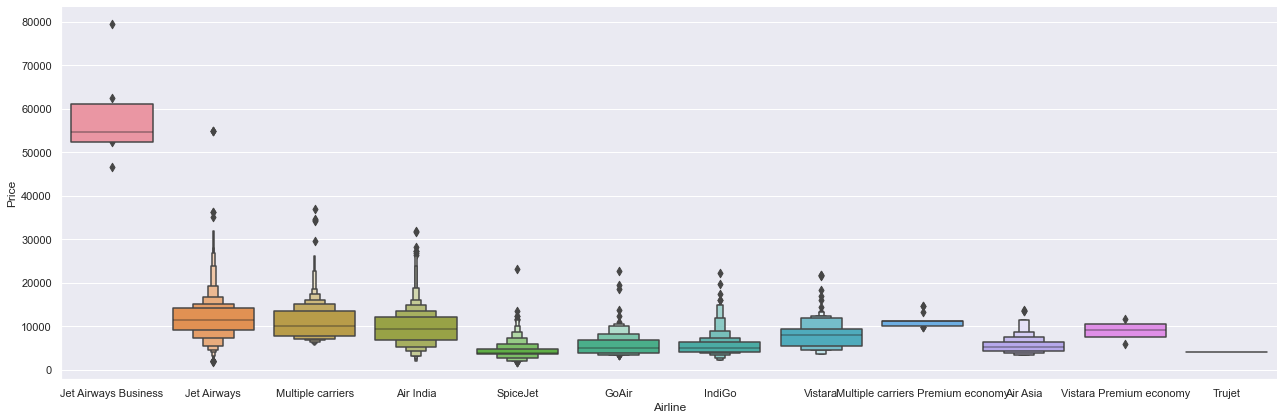

In [25]:
# Plotting the graph between features Airline and Price...

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that Jet Airways Buisness have the highest price.

Apart from the first airline almost all are having similar median..

In [26]:
# As airline is Nominal Categorival data we will perform OneHotEncoding

Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

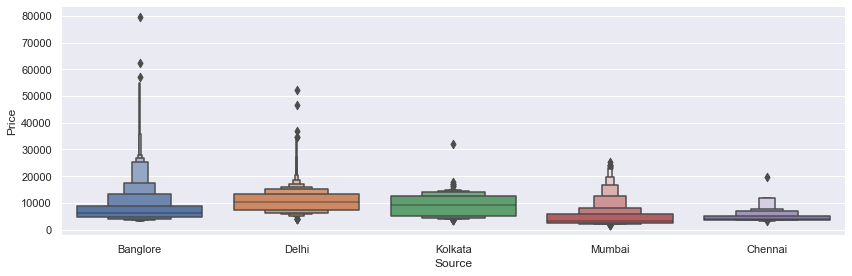

In [28]:
# Plotting the graph between features Source and Price...

#Source vs Price
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [29]:
# As source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [33]:
# Additional_Info contains almost 80% no_info...
# Route and Total_Stops are related each other

train_data.drop(["Route","Additional_Info"], axis = 1, inplace = True)

In [34]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# As we can observe this is a case of Ordinal Categorical type, thus we perform LabelEncoder...
# Here values are assigned with corresponding Keys

train_data.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [36]:
train_data.sample(5)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
1007,Jet Airways,Banglore,Delhi,0,8016,24,6,7,10,10,10,3,0
6645,IndiGo,Delhi,Cochin,1,7514,6,3,8,35,22,20,13,45
10422,Multiple carriers,Delhi,Cochin,1,9856,24,6,7,5,16,10,9,5
1912,GoAir,Delhi,Cochin,1,6393,1,6,7,25,13,35,6,10
7100,Air India,Kolkata,Banglore,2,13616,18,5,9,25,17,20,31,55


In [37]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)    #Concatenate dataframe ---> train_data + Airline + Source + Destination

In [38]:
data_train.sample(5)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10194,IndiGo,Kolkata,Banglore,0,5644,3,6,14,25,16,55,2,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
100,Jet Airways,Kolkata,Banglore,1,14781,15,5,8,25,20,45,12,20,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1308,Multiple carriers,Delhi,Cochin,1,8266,15,5,8,45,19,15,10,30,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1816,Jet Airways,Banglore,Delhi,0,8016,27,6,11,10,14,5,2,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8967,Jet Airways,Delhi,Cochin,2,10368,9,6,9,40,4,25,18,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [39]:
data_train.drop(["Airline","Source","Destination"], axis = 1, inplace = True)     #Since features --> Airline, Source and Destination are of no use..

In [40]:
data_train.sample(5)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
9770,0,5678,6,6,2,55,4,20,1,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
480,1,8529,12,6,20,0,12,0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7001,3,14221,24,3,12,0,23,15,35,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1891,2,10368,1,6,9,40,12,35,26,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9246,2,15339,27,6,13,25,19,0,29,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [41]:
data_train.shape

(10682, 30)

# Testing set for computation

In [42]:
test_data = pd.read_excel(r"C:\\FE ENGINNEERING\\UNSCHOOL\\UNSCHOOL - PROJECTS\\PROJECTS\\DATA SCIENCE\\Test_set_.xlsx")

In [43]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [45]:
test_data.sample(5) # sample of test_data...

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
1330,Vistara,Banglore,Delhi,0,1,5,17,0,19,35,2,35
488,Jet Airways,Delhi,Cochin,1,9,5,9,0,19,0,10,0
1051,SpiceJet,Mumbai,Hyderabad,0,6,5,13,15,14,45,1,30
541,IndiGo,Chennai,Kolkata,0,24,3,14,40,17,5,2,25
328,Air Asia,Delhi,Cochin,1,21,5,20,45,7,10,10,25


# Feature Selection

In feature selection, we will going to find out the best feature which will contribute and have good relation with target variables.

Following are some of the feature selection methods : 
    
    1. heatmap
    
    2. feature_importance_
    
    3. SelectKBest

In [46]:
data_train.shape

(10682, 30)

In [47]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [48]:
X = data_train.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
y = data_train.iloc[:,1]

In [50]:
y.head(5)

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

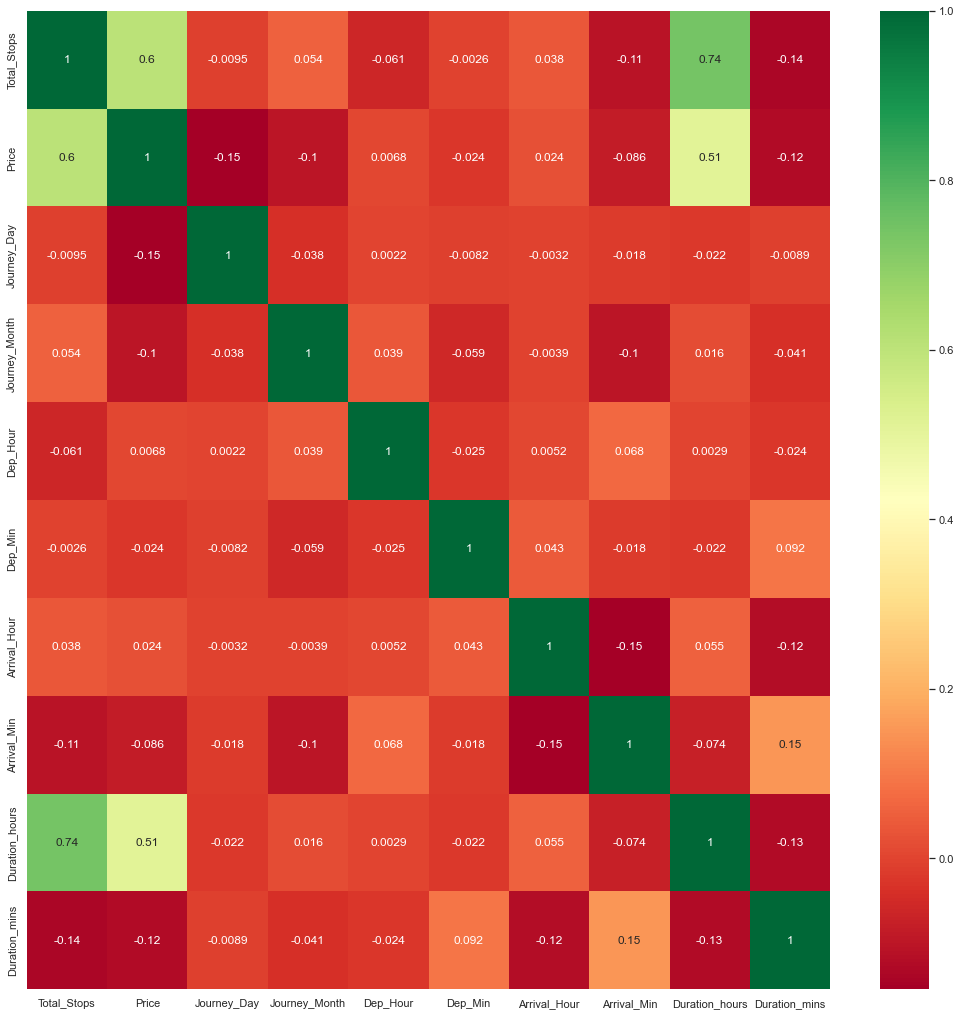

In [51]:
# Correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot=True, cmap = "RdYlGn")

plt.show()

In [52]:
# Importing feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [53]:
print(selection.feature_importances_)

[2.09093570e-01 1.43063584e-01 5.36093776e-02 2.47815133e-02
 2.13936097e-02 2.82195774e-02 1.94866885e-02 1.40857600e-01
 1.70955817e-02 9.49968047e-03 2.08522158e-03 1.89538361e-02
 1.41511387e-01 6.72657930e-02 1.82871970e-02 9.03091722e-04
 3.49530849e-03 1.03762907e-04 4.85940751e-03 9.17856975e-05
 5.04114465e-04 8.25170227e-03 3.44251014e-03 5.97665125e-03
 1.24996082e-02 1.26488104e-02 6.50146603e-03 4.93441244e-04
 2.50241219e-02]


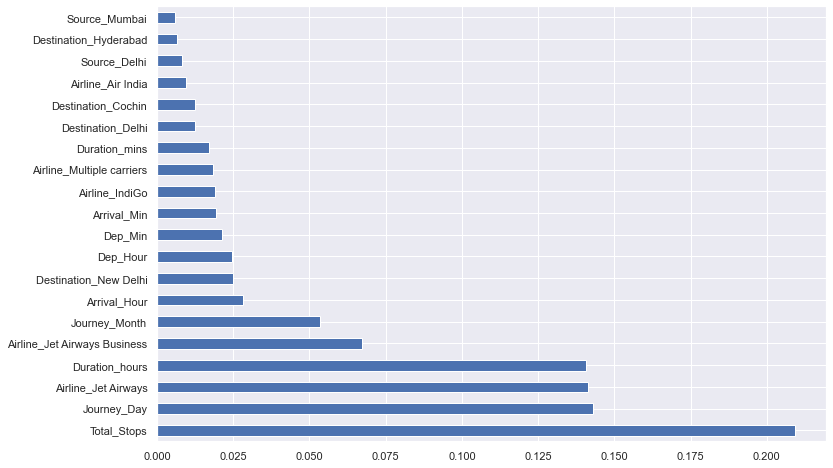

In [54]:
# plotting graph of features importances for better visualization

plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
y_pred = reg_rf.predict(X_test)

In [58]:
reg_rf.score(X_train, y_train)

0.9525101051898436

In [59]:
reg_rf.score(X_test, y_test)

0.796738084995977

C:\Users\Smarty Rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


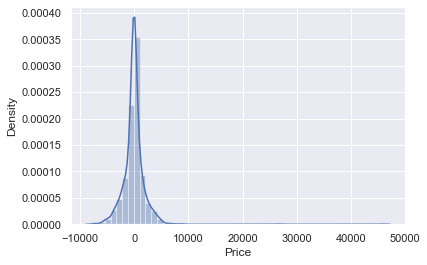

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

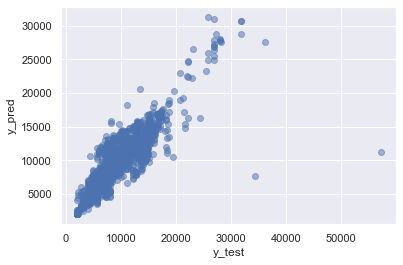

In [61]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [62]:
from sklearn import metrics

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.49819568943
MSE: 4382744.859873729
RMSE: 2093.5006233277622


In [64]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [65]:
metrics.r2_score(y_test, y_pred)

0.796738084995977

# Hyperparameter Tuning


Choose following method for hyperparameter tuning
    
    1.RandomizedSearchCV --> Fast
    
    2.GridSearchCV
    
Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [69]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [70]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [72]:
prediction = rf_random.predict(X_test)

C:\Users\Smarty Rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


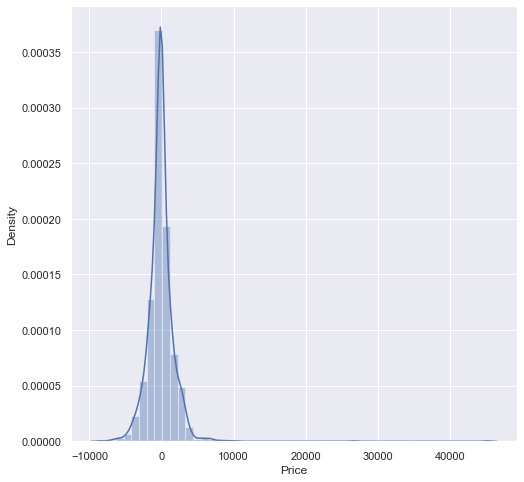

In [73]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

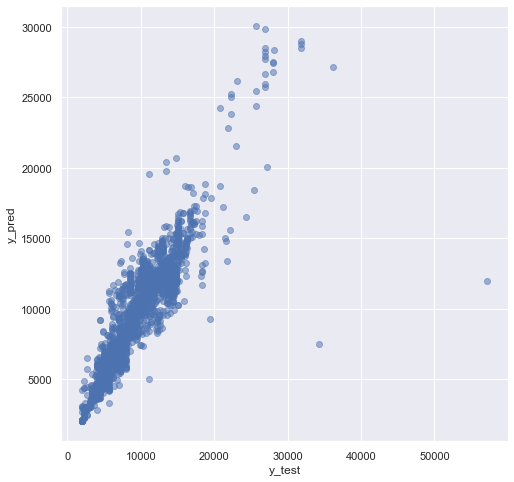

In [74]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1163.6605787208766
MSE: 4056769.850506933
RMSE: 2014.142460330682


# Save the model to reuse it again

In [76]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [77]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [78]:
y_prediction = forest.predict(X_test)

In [79]:
metrics.r2_score(y_test, y_prediction)

0.796738084995977

In [80]:
#******Project Done by Rohit Saktel*******